### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. You **ONLY** change the parts of the code we asked you to, nowhere else (change only the coding parts saying `# YOUR CODE HERE`, nothing else);
6. Don't add any new cells to this notebook;
7. Fill in your group number and the full names of the members in the cell below;
8. Make sure that you are not running an old version of IPython (we provide you with a cell that checks this, make sure you can run it without errors).

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

---

Group number and member names:

In [ ]:
GROUP = "27"
NAME1 = "Chao Fang"
NAME2 = "Yuxuan Xia"

Make sure you can run the following cell without errors.

In [ ]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# HA1 - Cats and dogs

<img src="http://lghttp.32478.nexcesscdn.net/80E972/organiclifestylemagazine/wp-content/uploads/2015/10/Cats-and-Dogs.jpg" alt="Cats and dogs" style="width: 5000px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colored images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

As a way of helping you speed up the training process, each group gets 6 hours of access to an instance in Google Cloud with a K80 GPU. Take a look at the [Instructions folder](https://github.com/JulianoLagana/deep-machine-learning/tree/master/Instructions) to understand how to connect to this instance and use our tools there. You're free to use this resource as you see fit, but if you run out of hours you'll need a late day to obtain more (and you can only do this once).

In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-4) in your own computer (these tasks can be solved only on the CPU), and leave most of the available hours for solving tasks 5-6, and refining your best model further (and, if you have the spare hours, experiment a bit!).

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance.

Tips:
- If you get errors saying you've exhausted the GPU resources, well, then you exhausted the GPU resources ;). However, sometimes that's because TensorFlow didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough credits on google cloud to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [177]:
# YOUR CODE HERE
# The package for importing the dataset (already provided by Keras)
import multiprocessing

# Data preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Packages for defining the architecture of our model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout, Activation, regularizers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.models import Model, load_model

# One-hot encoding
from keras.utils import np_utils

# Callbacks for training
from keras.callbacks import TensorBoard, EarlyStopping

# Ploting
import matplotlib.pyplot as plt
%matplotlib inline

# Ndarray computations
import numpy as np

# Confusion matrix for assessment step
from sklearn.metrics import confusion_matrix

---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats) and download the data from there. You should download both the test and train folders together in one zip file (by clicking the download all button). The split ratio between training and validation has not been made, you'll need to do it yourself. The `test.zip` file contains unlabeled data, so that participants in the contest are not able to train on this set.

For this assignment you should use [data generators](https://keras.io/preprocessing/image/) to load the images to your CPU/GPU memory. Because of this, your folder structure for the data should conform to the folder structure expected by the data generators (i.e. the samples should be separated into one folder for each class). Furthermore, we ask you to first start with a smaller subset of the data (1/5 of the number of samples), in order to test different models faster.

This means that you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      Cats        Dogs       Cats        Dogs       Cats        Dogs       Cats        Dogs

The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`. We provide you a notebook that shows how to achieve this ("Create project structure.ipynb"), starting from the original `all.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

We advise you to use 30% of the data as validation data in the smaller dataset. However, for the larger dataset, you should decide how to split between training and validation. Please specify your splits in the following cells.

For the larger subset, what was the training/validation split that you decided to use?

**% Samples in the training set:**

In [ ]:
# YOUR CODE HERE
train_size_percent = 0.8

**% Samples in the validation set:**

In [ ]:
# YOUR CODE HERE
vad_size_percent = 0.2

Fill in the dataset paths (to be used later by your data generators):

In [3]:
# YOUR CODE HERE
train_data_path = 'small_train'
vad_data_path = 'small_val'

---
Once you have the expected folder structure, create two data generators for automatically generating batches from the images in your smaller subset of data. Don't use any [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/), but feel free to preprocess the data as you see fit. After instantiating them, run the `flow_from_directory` method with the desired arguments.

Hints:
- The specified `batch_size` should be chosen so that your don't run out of memory.
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. If so, take a look at the argument `target_size` for the `flow_from_directory` method of data generators.
- Resizing the images to a smaller size while loading them can be beneficial.

In [4]:
# YOUR CODE HERE
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        vad_data_path,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


---
## 2. Training

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).

Tip:
- If Tensorflow is your backend, your `input_shape` is always `(img_width, img_height, 3)` (i.e. channels **last**)

In [5]:
# YOUR CODE HERE
def test_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = test_model()

Train your model using the `fit_generator` method and the two data generators you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Tips:
- Usually the bottleneck is when loading the images from the disk. To speed up training, make sure to take a look at the arguments `workers` and `use_multiprocessing` of `fit_generator`.
- You don't have to set the argument `steps_per_epoch` to the number of batches in an epoch. Instead, you can choose a lower number to obtain more frequent prints about the current loss and accuracy of your model (but then have in mind that you're not actually training for the number of epochs you specify in `epochs`).

In [6]:
# YOUR CODE HERE
history = model.fit_generator(
        train_generator,
        steps_per_epoch=1750 // batch_size,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=750 // batch_size,
        workers=multiprocessing.cpu_count(),
        use_multiprocessing=1,)

Epoch 1/30
54/54 [==============================] - 207s 4s/step - loss: 0.6962 - acc: 0.6173 - val_loss: 0.6544 - val_acc: 0.6320
Epoch 2/30
54/54 [==============================] - 204s 4s/step - loss: 0.6218 - acc: 0.6632 - val_loss: 0.8381 - val_acc: 0.5233
Epoch 3/30
54/54 [==============================] - 204s 4s/step - loss: 0.5677 - acc: 0.7141 - val_loss: 0.6410 - val_acc: 0.6587
Epoch 4/30
54/54 [==============================] - 203s 4s/step - loss: 0.5182 - acc: 0.7347 - val_loss: 0.7890 - val_acc: 0.5667
Epoch 5/30
54/54 [==============================] - 204s 4s/step - loss: 0.4870 - acc: 0.7598 - val_loss: 0.8542 - val_acc: 0.5900
Epoch 6/30
54/54 [==============================] - 205s 4s/step - loss: 0.4750 - acc: 0.7610 - val_loss: 0.6303 - val_acc: 0.6580
Epoch 7/30
54/54 [==============================] - 204s 4s/step - loss: 0.4145 - acc: 0.8171 - val_loss: 0.5905 - val_acc: 0.6847
Epoch 8/30
54/54 [==============================] - 203s 4s/step - loss: 0.4309 - a

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

Hint:
- The `fit_generator` method returns a `history` object.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


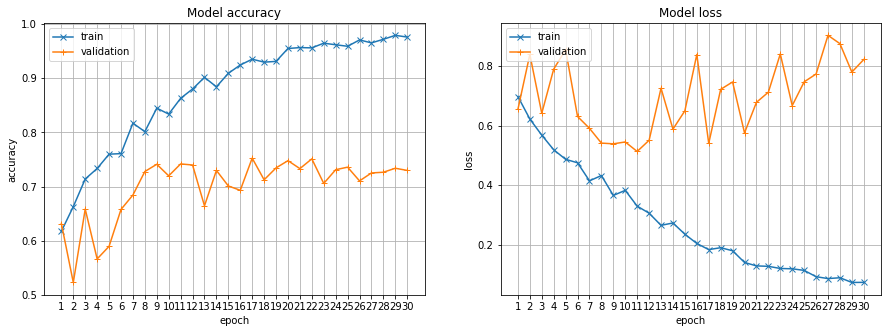

In [60]:
# YOUR CODE HERE
print(history.history.keys())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# summarize history for accuracy
axes[0].plot(range(1,31), history.history['acc'], '-x')
axes[0].plot(range(1,31), history.history['val_acc'], '-+')
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_xticks(range(1,31))
axes[0].grid(linestyle='-')
axes[0].legend(['train', 'validation'], loc='upper left')

# summarize history for loss
axes[1].plot(range(1,31), history.history['loss'], '-x')
axes[1].plot(range(1,31), history.history['val_loss'], '-+')
axes[1].set_title('Model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].set_xticks(range(1,31))
axes[1].grid(linestyle='-')
axes[1].legend(['train', 'validation'], loc='upper left')



Based on these, what would you suggest for improving your model? Why?

**Your answer:** The results show that, after 10 epochs, the validation accuracy stoped increasing and the validation loss started to increase (though the general trend is fluctuating). This means that the network stoped learning useful information at (around) the 10th epoch and started to adapt to irrelevent information, with respect to classification task, in the training data set, i.e., overfitting. In order to improve the model, one can use, e.g., weight regularization, more aggressive dropout, or better architectures. Considering that it seems not very useful to add dropout in convolution layer, we decide to do L2 norm regularization instead (Dropout has already been used on fully connected layer).

---
## 3. Improving your initial model

Improve your initial model according to you answer above. Write the new definition in the cell below and train it.

In [9]:
# YOUR CODE HERE
def test_model2():
    
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3), kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = test_model2()

history2 = model.fit_generator(
        train_generator,
        steps_per_epoch=1750 // batch_size,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=750 // batch_size,
        workers=multiprocessing.cpu_count(),
        use_multiprocessing=1,)

Epoch 1/30
54/54 [==============================] - 222s 4s/step - loss: 1.1239 - acc: 0.6198 - val_loss: 1.0483 - val_acc: 0.6393
Epoch 2/30
54/54 [==============================] - 209s 4s/step - loss: 1.0037 - acc: 0.6707 - val_loss: 0.9543 - val_acc: 0.6753
Epoch 3/30
54/54 [==============================] - 207s 4s/step - loss: 0.8520 - acc: 0.7394 - val_loss: 0.8756 - val_acc: 0.7060
Epoch 4/30
54/54 [==============================] - 224s 4s/step - loss: 0.8401 - acc: 0.7245 - val_loss: 0.9467 - val_acc: 0.6820
Epoch 5/30
54/54 [==============================] - 225s 4s/step - loss: 0.7404 - acc: 0.7714 - val_loss: 0.9056 - val_acc: 0.6700
Epoch 6/30
54/54 [==============================] - 224s 4s/step - loss: 0.7208 - acc: 0.7698 - val_loss: 0.8707 - val_acc: 0.6667
Epoch 7/30
54/54 [==============================] - 224s 4s/step - loss: 0.6288 - acc: 0.8343 - val_loss: 0.7649 - val_acc: 0.7327
Epoch 8/30
54/54 [==============================] - 209s 4s/step - loss: 0.6319 - a

How does the model perform, compared to the initial model? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

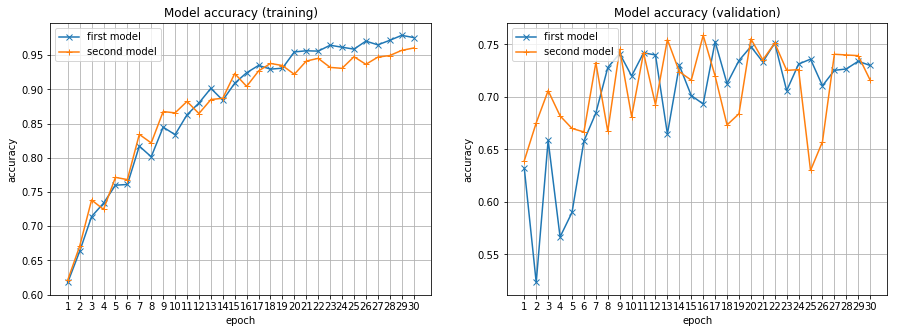

In [65]:
# YOUR CODE HERE

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# summarize history for accuracy
axes[0].plot(range(1,31), history.history['acc'], '-x')
axes[0].plot(range(1,31), history2.history['acc'], '-+')
axes[0].set_title('Model accuracy (training)')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_xticks(range(1,31))
axes[0].grid(linestyle='-')
axes[0].legend(['first model', 'second model'], loc='upper left')

# summarize history for loss
axes[1].plot(range(1,31), history.history['val_acc'], '-x')
axes[1].plot(range(1,31), history2.history['val_acc'], '-+')
axes[1].set_title('Model accuracy (validation)')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_xticks(range(1,31))
axes[1].grid(linestyle='-')
axes[1].legend(['first model', 'second model'], loc='upper left')

Did your results improve? Explain why, or why not.

**Your answer:** These two models presented very similar training performance in terms of traning accuracy and number of epochs. Also, if only looking at the validation model accuracy at the end of the training, the results basiclly remained the same. However, adding weight regularization to convolutional layer does increase convergence. This can be verified from the results that, during the first 10 epochs, the validation accuracy, in the second model, increases faster than it in the first one. We suspect the reason why weight regularization does not help generalisation that much is that, the model used may not have sufficient capacity to learn new useful information. Note that, we have tried larger regularization parameter 0.1; in this case, the model, however, begined to suffer from underfitting. Perhaps, finer tuning the regulariization parameter is required to further reduce over-fitting. Also, the network architecture remains the same; this explains why the difference betweeen these two models is small.

---
## 4. Obtaining the *best* model

Continue to improve your model architecture by comparing the value of the metrics you're interested in both the training and validation set. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here. Save the optimization history (i.e. the `history` object returned by the `fit_generator`). You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to ping-pong, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [35]:
# YOUR CODE HERE
def test_model3():
    
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3), kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = test_model3()

history3 = model.fit_generator(
        train_generator,
        steps_per_epoch=3500 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=1500 // batch_size,
        workers=multiprocessing.cpu_count(),
        use_multiprocessing=1,)

Epoch 1/20
109/109 [==============================] - 360s 3s/step - loss: 1.0930 - acc: 0.6106 - val_loss: 1.0061 - val_acc: 0.6167
Epoch 2/20

109/109 [==============================] - 347s 3s/step - loss: 0.8554 - acc: 0.7198 - val_loss: 0.9872 - val_acc: 0.5887
Epoch 3/20
109/109 [==============================] - 347s 3s/step - loss: 0.7131 - acc: 0.7836 - val_loss: 0.8511 - val_acc: 0.6767
Epoch 4/20
109/109 [==============================] - 347s 3s/step - loss: 0.6277 - acc: 0.8075 - val_loss: 0.7067 - val_acc: 0.7320
Epoch 5/20
109/109 [==============================] - 346s 3s/step - loss: 0.5398 - acc: 0.8376 - val_loss: 0.7675 - val_acc: 0.6980
Epoch 6/20
109/109 [==============================] - 2187s 20s/step - loss: 0.4749 - acc: 0.8625 - val_loss: 0.6720 - val_acc: 0.7333
Epoch 7/20
109/109 [==============================] - 1034s 9s/step - loss: 0.4269 - acc: 0.8785 - val_loss: 0.6673 - val_acc: 0.7440
Epoch 8/20
109/109 [==============================] - 361s 3s/ste

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

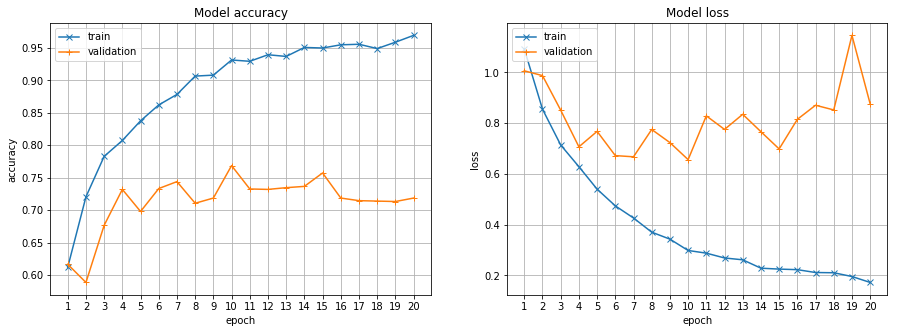

In [67]:
# YOUR CODE HERE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# summarize history for accuracy
axes[0].plot(range(1,21), history3.history['acc'], '-x')
axes[0].plot(range(1,21), history3.history['val_acc'], '-+')
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_xticks(range(1,21))
axes[0].grid(linestyle='-')
axes[0].legend(['train', 'validation'], loc='upper left')

# summarize history for loss
axes[1].plot(range(1,21), history3.history['loss'], '-x')
axes[1].plot(range(1,21), history3.history['val_loss'], '-+')
axes[1].set_title('Model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].set_xticks(range(1,21))
axes[1].grid(linestyle='-')
axes[1].legend(['train', 'validation'], loc='upper left')




[Save your model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) to disk as a HDF5 file (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual `.h5` files you create are not relevant to your ping-pong submission.

In [37]:
model.save('my_model.h5')

---
## 5. Transfer Learning

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected + classification layers). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the VGG16 model without the top layers, from the `applications` submodule from Keras. Make sure to also load the weights obtained from the ImageNet pretraining.

In [156]:
# YOUR CODE HERE
base_model = VGG16(include_top=False, weights='imagenet')
print('Model loaded.')

Model loaded.


Create a new model with the layers you want to add on top of VGG. The kernels and bias in these layers should be initialized randomly.

In [163]:
# YOUR CODE HERE

inputs = Input(shape=(150,150,3))
x = base_model(inputs)

#Add the fully-connected layers 
x = Flatten()(x)
x = Dense(512, kernel_initializer='random_uniform', bias_initializer='random_uniform', activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)


Now add the new model on top of VGG.

Tip:
- The VGG model you loaded from the `applications` submodule is from the [`Model`](https://keras.io/models/model/) class, not the `Sequential` class, so it doesn't have some methods you're used to (like `add`, for instance). It might be helpful to read [this introduction to the Model class](https://keras.io/getting-started/functional-api-guide/).

In [166]:
# YOUR CODE HERE
model = Model(inputs=inputs, outputs=x)

### 5.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the `trainable` attribute of them to `False`.

In [167]:
# YOUR CODE HERE
for layer in base_model.layers:
    layer.trainable = False

Create the callbacks (if any) you would like to use, compile the model and train it.

In [168]:
# YOUR CODE HERE
tb = TensorBoard(log_dir='./logs/vgg16_freeze')
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history_vgg16_freeze = model.fit_generator(
        train_generator,
        steps_per_epoch=3500 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=1500 // batch_size,
        callbacks = [tb],
        workers=multiprocessing.cpu_count(),
        use_multiprocessing=1,)

Epoch 1/20
109/109 [==============================] - 940s 9s/step - loss: 0.4985 - acc: 0.8161 - val_loss: 0.2560 - val_acc: 0.8947
Epoch 2/20

109/109 [==============================] - 912s 8s/step - loss: 0.2504 - acc: 0.8931 - val_loss: 0.2629 - val_acc: 0.8840
Epoch 3/20
109/109 [==============================] - 910s 8s/step - loss: 0.2057 - acc: 0.9171 - val_loss: 0.2329 - val_acc: 0.9107
Epoch 4/20
109/109 [==============================] - 911s 8s/step - loss: 0.1808 - acc: 0.9214 - val_loss: 0.2344 - val_acc: 0.9120
Epoch 5/20
109/109 [==============================] - 909s 8s/step - loss: 0.1572 - acc: 0.9330 - val_loss: 0.2474 - val_acc: 0.9053
Epoch 6/20
109/109 [==============================] - 911s 8s/step - loss: 0.1425 - acc: 0.9464 - val_loss: 0.2457 - val_acc: 0.9113
Epoch 7/20
109/109 [==============================] - 910s 8s/step - loss: 0.1018 - acc: 0.9579 - val_loss: 0.3111 - val_acc: 0.8907
Epoch 8/20
109/109 [==============================] - 909s 8s/step -

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

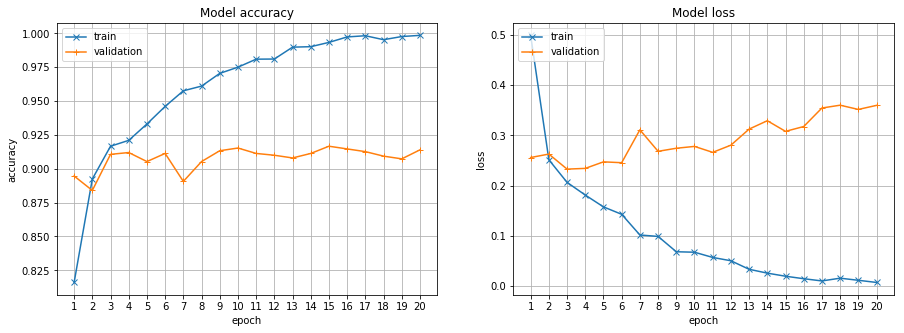

In [169]:
# YOUR CODE HERE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# summarize history for accuracy
axes[0].plot(range(1,21), history_vgg16_freeze.history['acc'], '-x')
axes[0].plot(range(1,21), history_vgg16_freeze.history['val_acc'], '-+')
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_xticks(range(1,21))
axes[0].grid(linestyle='-')
axes[0].legend(['train', 'validation'], loc='upper left')

# summarize history for loss
axes[1].plot(range(1,21), history_vgg16_freeze.history['loss'], '-x')
axes[1].plot(range(1,21), history_vgg16_freeze.history['val_loss'], '-+')
axes[1].set_title('Model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].set_xticks(range(1,21))
axes[1].grid(linestyle='-')
axes[1].legend(['train', 'validation'], loc='upper left')



How does the model perform, compared to the model obtained in step 4? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

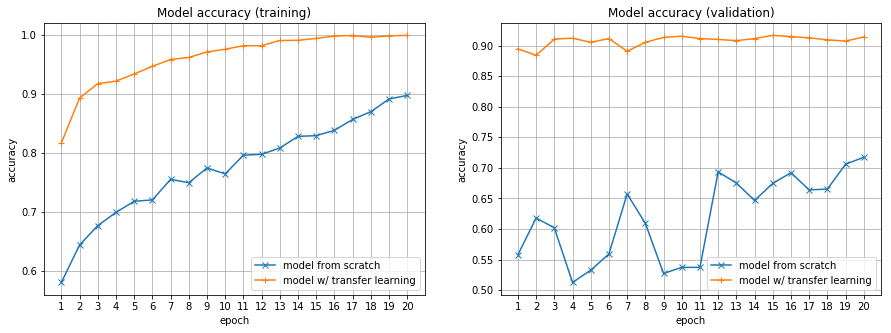

In [174]:
# YOUR CODE HERE

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# summarize history for accuracy
axes[0].plot(range(1,21), history3.history['acc'], '-x')
axes[0].plot(range(1,21), history_vgg16_freeze.history['acc'], '-+')
axes[0].set_title('Model accuracy (training)')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_xticks(range(1,21))
axes[0].grid(linestyle='-')
axes[0].legend(['model from scratch', 'model w/ transfer learning'], loc='lower right')

# summarize history for loss
axes[1].plot(range(1,21), history3.history['val_acc'], '-x')
axes[1].plot(range(1,21), history_vgg16_freeze.history['val_acc'], '-+')
axes[1].set_title('Model accuracy (validation)')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_xticks(range(1,21))
axes[1].grid(linestyle='-')
axes[1].legend(['model from scratch', 'model w/ transfer learning'], loc='lower right')

Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Explain how you evaluated this.

**Your answer:** The approach with transfer learning worked best. This can be verified from the fact that both training accuracy and validation accuracy of the model using transfer learning is higher than those of the model starting from scratch. Also, we can see that, in the plot showing the validation accuracy, the approach using transfer learning exhibited much less fluctuation regarding model accuracy; this suggests that it suffers much less (or no) from overfitting compared.

What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** 1. The ImageNet contains many many more data (images); 2. The ImageNet contains many more image classes rather than only dog and cat. 

Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** 1. The dog and cat are two classification categories that are also included in ImageNet. Therefore, we could use the relevent knowledge from the trained model using VGG and ImageNet to do the classification tasks in Dogs vs. Cats dataset; 2. With transfer learning, one can build a solid network architecture with comparatively little training data because the model is already pre-trained; 3. Save training time since, tycpically, one needs to only re-train the top layer(s). 

In which scenario would transfer learning be unsuitable?

**Your answer:** When we have very little training data for the specific task we are interested in; and the data set used in this task has very different features compared to the one, based on which, we do transfer learning.

Save the model to a HDF5 file.

In [175]:
model.save('trans_learning_top_only.h5')

### 5.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers.

Tip:
- Always recompile your model after changing anything in it!

In [179]:
# YOUR CODE HERE
model = load_model('trans_learning_top_only.h5')
for layer in model.layers:
    layer.trainable = True

Create the callbacks (if any) you would like to use for this training here, compile the model, and train it.

Tip:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

In [180]:
# YOUR CODE HERE
tb = TensorBoard(log_dir='./logs/vgg16_entire')
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])

history_vgg16_entire = model.fit_generator(
        train_generator,
        steps_per_epoch=3500 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=1500 // batch_size,
        callbacks = [tb],
        workers=multiprocessing.cpu_count(),
        use_multiprocessing=1,)

Epoch 1/20
109/109 [==============================] - 925s 8s/step - loss: 0.0093 - acc: 0.9980 - val_loss: 0.3559 - val_acc: 0.9140
Epoch 2/20

109/109 [==============================] - 904s 8s/step - loss: 0.0072 - acc: 0.9983 - val_loss: 0.3566 - val_acc: 0.9153
Epoch 3/20
109/109 [==============================] - 899s 8s/step - loss: 0.0060 - acc: 0.9991 - val_loss: 0.3583 - val_acc: 0.9160
Epoch 4/20
109/109 [==============================] - 902s 8s/step - loss: 0.0065 - acc: 0.9991 - val_loss: 0.3596 - val_acc: 0.9153
Epoch 5/20
109/109 [==============================] - 901s 8s/step - loss: 0.0069 - acc: 0.9989 - val_loss: 0.3603 - val_acc: 0.9153
Epoch 6/20
109/109 [==============================] - 902s 8s/step - loss: 0.0063 - acc: 0.9991 - val_loss: 0.3605 - val_acc: 0.9153
Epoch 7/20
109/109 [==============================] - 903s 8s/step - loss: 0.0052 - acc: 0.9989 - val_loss: 0.3611 - val_acc: 0.9153
Epoch 8/20
109/109 [==============================] - 898s 8s/step -

How does the model perform, compared to the model trained with freezed layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

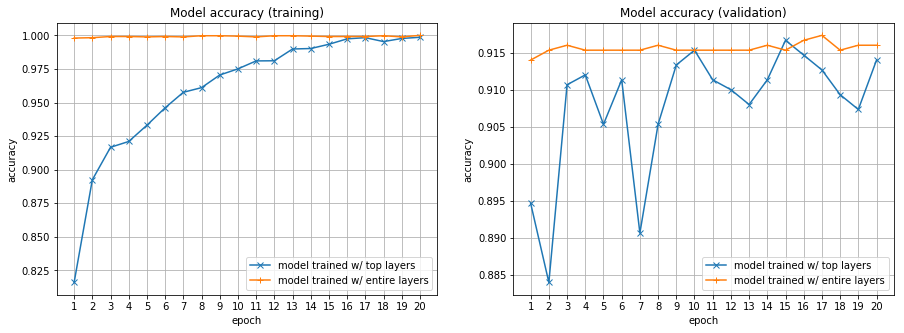

In [181]:
# YOUR CODE HERE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# summarize history for accuracy
axes[0].plot(range(1,21), history_vgg16_freeze.history['acc'], '-x')
axes[0].plot(range(1,21), history_vgg16_entire.history['acc'], '-+')
axes[0].set_title('Model accuracy (training)')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_xticks(range(1,21))
axes[0].grid(linestyle='-')
axes[0].legend(['model trained w/ top layers', 'model trained w/ entire layers'], loc='lower right')

# summarize history for loss
axes[1].plot(range(1,21), history_vgg16_freeze.history['val_acc'], '-x')
axes[1].plot(range(1,21), history_vgg16_entire.history['val_acc'], '-+')
axes[1].set_title('Model accuracy (validation)')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_xticks(range(1,21))
axes[1].grid(linestyle='-')
axes[1].legend(['model trained w/ top layers', 'model trained w/ entire layers'], loc='lower right')

Did the model's performance improve? Why (why not)?

**Your answer:** The model's performance improved when trained with entrie layers. The original VGG16 model is trained to do a much more complex multi-task classification problem. Because our objective is just to classify whether the image is dog or cat, unfreezing the hidden layers allows the already learned parameters to be further adapted, in a manner that, the network focuses on a much smaller objective (Dog or Cat). This explains the performance improvement.

Save the model to a HDF5 file.

In [182]:
model.save('trans_learning_full.h5')

### 5.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here.

In [ ]:
# YOUR CODE HERE

How does the model perform, compared to the model trained in step 5.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

Save the model to a HDF5 file.

In [ ]:
model.save('best_trans_learning.h5')

## 6. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data generators, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [ ]:
model = load_model('trans_learning_full.h5')

# YOUR CODE HERE

Create the callbacks you would like to use and train your model. This optimization might take a long time, so TensorBoard is advised ;).

In [ ]:
# YOUR CODE HERE

How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

What can you conclude from these plots?

**Your answer:** (fill in here)

## 7. Evaluation on test set

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. Instead, we'll create a .csv file containing the predictions for each sample, and submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Tip:
- There is a sample_submission file available for download in the same place where you downloaded the data from. Take a look at it to better understand what is the expected format here.

Hints:
- The Python module `os` has a `listdir` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.
- Keras has a submodule called `preprocessing.image`, with some handy functions (for instance `load_img` and `img_to_array`)

In [ ]:
# YOUR CODE HERE

Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, so submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition). Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** (fill in here)

What was the username you used for this submission?

**Your answer:** (fill in here)